In [61]:
#imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#base de dados
df = pd.read_csv("./Cleaned-Data.csv").drop(columns = 'Country')

In [3]:
#linhas e colunas dos dados
df.shape

(316800, 26)

In [5]:
#desmonstração da base de dados
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [6]:
#índices, colunas, quantidade de valores por colunas, tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

In [7]:
#características da base de dados
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')

In [8]:
#criação da coluna "fique em casa" com o valor falso.
df['Stay_Home'] = 0

In [9]:
#criação dos valores verdadeiros para a coluna "fique em casa", caso a gravidade seja nenhuma ou leve.
df.loc[(df.Severity_None == 1) | (df.Severity_Mild == 1), "Stay_Home"] = 1

In [10]:
#dados da coluna "fique em casa"
df.Stay_Home

0         1
1         1
2         1
3         0
4         0
         ..
316795    0
316796    0
316797    1
316798    1
316799    1
Name: Stay_Home, Length: 316800, dtype: int64

In [11]:
#separação das características usadas no modelo, removendo as que o modelo pode obter a resposta
x = df.drop(columns = 'Stay_Home').drop(columns = 'Severity_None').drop(columns = 'Severity_Mild').drop(columns = 'Severity_Moderate').drop(columns = 'Severity_Severe')
#separação dos dados com a resposta correta
y = df.Stay_Home

#separação do conjuto de dados para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 70)

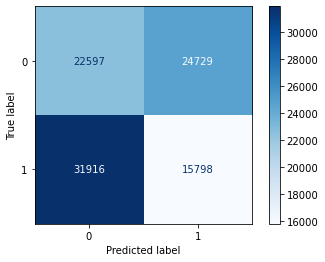

In [41]:
#utilização do modelo árvore de decisão para classificar a resposta em fique em casa para verdadeiro ou falso
model_tree = DecisionTreeClassifier(random_state=7)
model_tree.fit(x_train, y_train)

#avaliação do resultado do modelo utilizando a matriz de confusão
plot_confusion_matrix(model_tree, x_test, y_test, cmap='Blues')

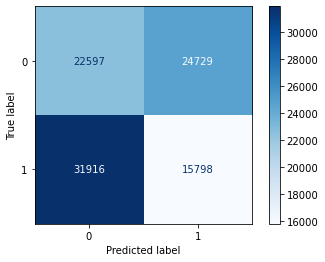

In [42]:
#utilizando o mesmo modelo com alteração do hiperparâmetro
model_tree2 = DecisionTreeClassifier(criterion='entropy', random_state=70)
model_tree2.fit(x_train, y_train)
plot_confusion_matrix(model_tree2, x_test, y_test, cmap='Blues')

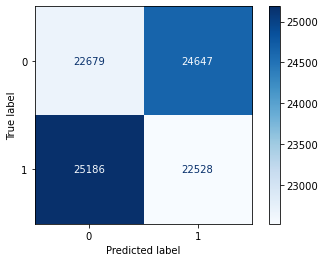

In [43]:
#Tentativa utilizando o modelo KNN - senta que lá vem história...

model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
plot_confusion_matrix(model_knn, x_test, y_test, cmap='Blues')

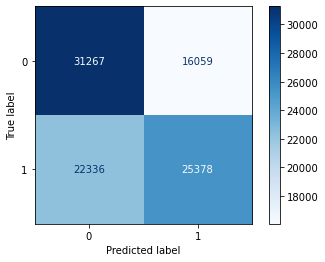

In [53]:
#utilizando Stacking - senta que lá vem história ao quadrado...
model_stacking = StackingClassifier(estimators=[('knn',model_knn), ('tree',model_tree), ('tree2',model_tree2)])
model_stacking.fit(x_train, y_train)
plot_confusion_matrix(model_stacking, x_test, y_test, cmap='Blues');

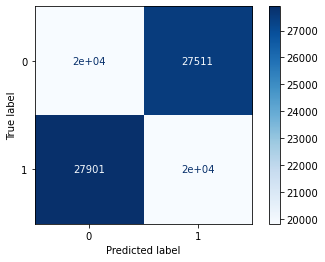

In [62]:
#utilizando Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True, max_features=7)
model.fit(x_train, y_train)
plot_confusion_matrix(model,x_test,y_test, cmap='Blues')

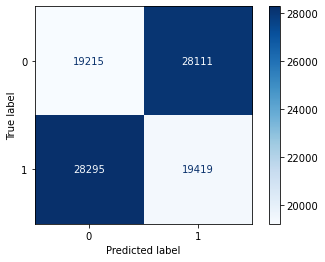

In [63]:
#utilizando o mesmo modelo alterando os hiperparâmetros
model = RandomForestClassifier(n_estimators=50, random_state=0, oob_score=True)
model.fit(x_train, y_train)
plot_confusion_matrix(model,x_test,y_test, cmap='Blues')

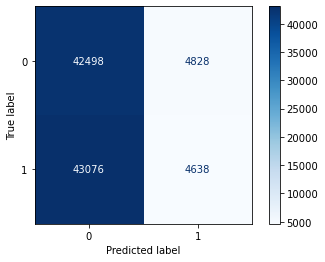

In [65]:
#utilizando grid search
parameters = {'max_depth':range(2,13), 'min_samples_leaf':range(1,10)}
modelGS = GridSearchCV(model, parameters)

modelGS.fit(x_train, y_train)
modelGS.best_params_

plot_confusion_matrix(modelGS,x_test,y_test, cmap='Blues')

In [ ]:
#utilizando o modelo de regressão logística
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

In [51]:
#realizando a acurácia dos resultados
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}).head(15)

,y_pred,y_test
64825,0,1
602,0,1
106410,0,0
174810,1,0
257,0,0
217963,0,0
297704,1,0
124813,0,1
264858,0,0
12872,0,0


In [48]:
#verificando a acurácia em porcentagem (0.49 = 49%)
accuracy_score(y_test, y_pred)

0.4949074074074074

In [49]:
#verificando a acurácia na matriz de confusão
confusion_matrix(y_test, y_pred)

array([[28528, 18798],
       [29206, 18508]], dtype=int64)

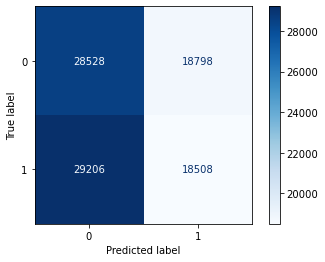

In [50]:
#visualizando a matriz de confusão de maneira gráfica
plot_confusion_matrix(model, x_test, y_test, values_format = '.0f', cmap = 'Blues');